In [91]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ldirt = ctrl.Antecedent(np.arange(0, 11, 1), 'Load Dirtiness')
lvol = ctrl.Antecedent(np.arange(0, 11, 1), 'Load Volume')
time = ctrl.Consequent(np.arange(0, 50, 1), 'Time to clean')

ldirt.automf(names=['vd', 'md', 'ld', 'nd'])
lvol.automf(names = ['fl', 'ml', 'll'])

time['lit'] = fuzz.trimf(time.universe, [0, 0, 13])
time['mt'] = fuzz.trimf(time.universe, [0, 13, 25])
time['lot'] = fuzz.trimf(time.universe, [13, 25, 35])
time['vlot'] = fuzz.trimf(time.universe, [25, 49, 49])

C:\Users\NEW\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


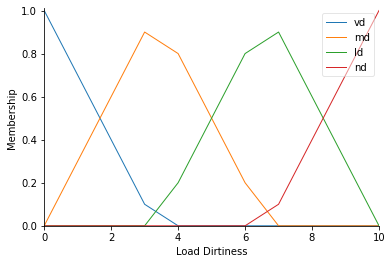

In [92]:
ldirt.view()

C:\Users\NEW\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


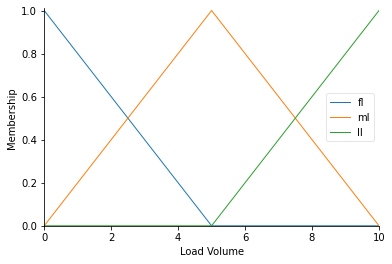

In [93]:
lvol.view()

C:\Users\NEW\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


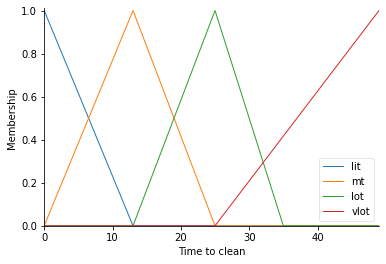

In [94]:
time.view()

In [96]:
rule1 = ctrl.Rule(lvol['fl'] & ldirt['vd'], time['vlot'])
rule2 = ctrl.Rule(lvol['ml'] & ldirt['vd'], time['vlot'])
rule3 = ctrl.Rule(lvol['ll'] & ldirt['vd'], time['lot'])
rule4 = ctrl.Rule(lvol['fl'] & ldirt['md'], time['vlot'])
rule5 = ctrl.Rule(lvol['ml'] & ldirt['md'], time['mt'])
rule6 = ctrl.Rule(lvol['ll'] & ldirt['md'], time['lot'])
rule7 = ctrl.Rule(lvol['fl'] & ldirt['ld'], time['lot'])
rule8 = ctrl.Rule(lvol['ml'] & ldirt['ld'], time['mt'])
rule9 = ctrl.Rule(lvol['ll'] & ldirt['ld'], time['lit'])
rule10 = ctrl.Rule(lvol['fl'] & ldirt['nd'], time['lit'])
rule11 = ctrl.Rule(lvol['ml'] & ldirt['nd'], time['lit'])
rule12 = ctrl.Rule(lvol['ll'] & ldirt['nd'], time['lit'])

In [97]:
rule_set = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

In [98]:
tipping = ctrl.ControlSystemSimulation(rule_set)

In [105]:
tipping.input['Load Dirtiness'] = 3.5
tipping.input['Load Volume'] = 4

tipping.compute()

19.475037852023835


C:\Users\NEW\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


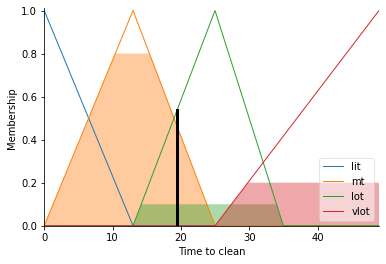

In [106]:
print(tipping.output['Time to clean'])
time.view(sim=tipping)